In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

In [2]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data

In [3]:
#------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import pearsonr                                    # Importing pearson test to check correlation
import statsmodels.api as sm                                        # Importing statsmodel api
#-------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objects as go                                   # Importing plotly graphical interface
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

/var/folders/hx/kqn1vs8s2ll8zw0b83n22r2r0000gn/T/ipykernel_82663/2866187323.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)


In [4]:
data = pd.read_csv(filepath_or_buffer='TrainData.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (181, 27)


ID  symboling normalized-losses     make fuel-type aspiration num-of-doors  \
0   1         -1                65   toyota       gas        std         four   
1   2          0               188      bmw       gas        std          two   
2   3          0                 ?  renault       gas        std         four   
3   4          0               161   peugot    diesel      turbo         four   
4   5         -2               103    volvo       gas        std         four   

  body-style drive-wheels engine-location  wheel-base    length    width  \
0  hatchback          fwd           front   102.40000 175.60000 66.50000   
1      sedan          rwd           front   101.20000 176.80000 64.80000   
2      wagon          fwd           front    96.10000 181.50000 66.50000   
3      sedan          rwd           front   107.90000 186.70000 68.40000   
4      sedan          rwd           front   104.30000 188.80000 67.20000   

    height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0 53.90000         2458         ohc             four          122        mpfi   
1 54.30000         2710         ohc              six          164        mpfi   
2 55.20000         2579         ohc             four          132        mpfi   
3 56.70000         3197           l             four          152         idi   
4 56.20000         2935         ohc             four          141        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.31   3.54            8.70000         92     4200        27           32   
1  3.31   3.19            9.00000        121     4250        21           28   
2  3.46    3.9            8.70000          ?        ?        23           31   
3   3.7   3.52           21.00000         95     4150        28           33   
4  3.78   3.15            9.50000        114     5400        24           28   

   price  
0  11248  
1  20970  
2   9295  
3  13200  
4  15985

In [5]:
df=data.copy()

In [6]:
df

ID  symboling normalized-losses           make fuel-type aspiration  \
0      1         -1                65         toyota       gas        std   
1      2          0               188            bmw       gas        std   
2      3          0                 ?        renault       gas        std   
3      4          0               161         peugot    diesel      turbo   
4      5         -2               103          volvo       gas        std   
5      6          1               118          dodge       gas      turbo   
6      7          0               145         jaguar       gas        std   
7      8          3                 ?        porsche       gas        std   
8      9          0                89         subaru       gas        std   
9     10          3               153     mitsubishi       gas      turbo   
10    11          0                91         toyota    diesel        std   
11    12         -1                65         toyota       gas        std   
12    13          0                 ?     volkswagen       gas        std   
13    14          1               107          honda       gas        std   
14    15         -1                95          volvo       gas        std   
15    16          0               102         subaru       gas      turbo   
16    17          1               104          mazda       gas        std   
17    18         -1                93  mercedes-benz    diesel      turbo   
18    19          0                85         subaru       gas        std   
19    20          2               137          honda       gas        std   
20    21          2               104           saab       gas      turbo   
21    22         -1                93  mercedes-benz    diesel      turbo   
22    23          3               150           saab       gas      turbo   
23    24          3               150          mazda       gas        std   
24    25          1               148          dodge       gas        std   
25    26          3               150           saab       gas        std   
26    27         -2               103          volvo       gas      turbo   
27    28          0                85          honda       gas        std   
28    29         -1                74          volvo       gas        std   
29    30          3               142  mercedes-benz       gas        std   
30    31          0               110          honda       gas        std   
31    32          1               125     mitsubishi       gas        std   
32    33          1               118          dodge       gas        std   
33    34          1               231         nissan       gas        std   
34    35          3               197         toyota       gas        std   
35    36          1               168         toyota       gas        std   
36    37          1                 ?            bmw       gas        std   
37    38          1                 ?        mercury       gas      turbo   
38    39          0                 ?         peugot    diesel      turbo   
39    40          3               145          dodge       gas      turbo   
40    41          1                87         toyota       gas        std   
41    42          0               106          honda       gas        std   
42    43          0               108         nissan       gas        std   
43    44         -1               137     mitsubishi       gas        std   
44    45          3                 ?       plymouth       gas      turbo   
45    46          0                91         toyota       gas        std   
46    47          0               102         subaru       gas        std   
47    48          2               134         toyota       gas        std   
48    49          2               168         nissan       gas        std   
49    50          0                 ?            bmw       gas        std   
50    51          0               115          mazda       gas        std   
51

In [7]:
df.head()

ID  symboling normalized-losses     make fuel-type aspiration num-of-doors  \
0   1         -1                65   toyota       gas        std         four   
1   2          0               188      bmw       gas        std          two   
2   3          0                 ?  renault       gas        std         four   
3   4          0               161   peugot    diesel      turbo         four   
4   5         -2               103    volvo       gas        std         four   

  body-style drive-wheels engine-location  wheel-base    length    width  \
0  hatchback          fwd           front   102.40000 175.60000 66.50000   
1      sedan          rwd           front   101.20000 176.80000 64.80000   
2      wagon          fwd           front    96.10000 181.50000 66.50000   
3      sedan          rwd           front   107.90000 186.70000 68.40000   
4      sedan          rwd           front   104.30000 188.80000 67.20000   

    height  curb-weight engine-type num-of-cylinders  engine-size fuel-system  \
0 53.90000         2458         ohc             four          122        mpfi   
1 54.30000         2710         ohc              six          164        mpfi   
2 55.20000         2579         ohc             four          132        mpfi   
3 56.70000         3197           l             four          152         idi   
4 56.20000         2935         ohc             four          141        mpfi   

   bore stroke  compression-ratio horsepower peak-rpm  city-mpg  highway-mpg  \
0  3.31   3.54            8.70000         92     4200        27           32   
1  3.31   3.19            9.00000        121     4250        21           28   
2  3.46    3.9            8.70000          ?        ?        23           31   
3   3.7   3.52           21.00000         95     4150        28           33   
4  3.78   3.15            9.50000        114     5400        24           28   

   price  
0  11248  
1  20970  
2   9295  
3  13200  
4  15985

<Axes: >

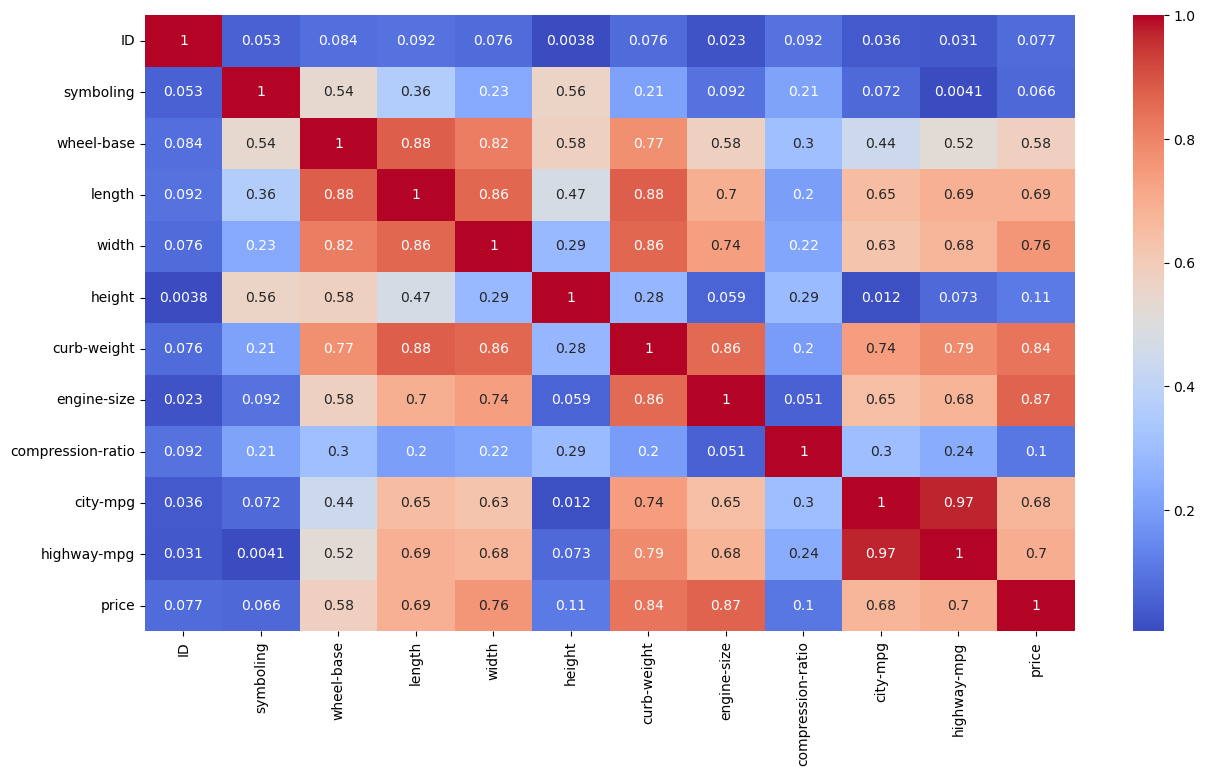

In [7]:
## Correlation Heatmap
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [8]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre Profiling Report.html')
print('Pre-Profiling Report Ready to Download!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Pre-Profiling Report Ready to Download!


In [9]:
profile

In [13]:
#Lets load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
lm

LinearRegression()

In [14]:
X = df[['highway-mpg']]
Y = df['price']
#Fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression()

In [15]:
Yhat=lm.predict(X)
Yhat[0:5] 

array([12159.53814907, 15444.95194529, 12980.89159812, 11338.18470001,
       15444.95194529])

In [16]:
print('RMSE [Train]:', np.mean(mean_squared_error(Y, Yhat)))

RMSE [Train]: 33516631.60170749


In [17]:
print(lm.intercept_)
print(lm.coef_)

38442.848518875944
[-821.35344906]


In [18]:
lm1 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm1.fit(X,Y)

LinearRegression()

In [19]:
Yhat=lm1.predict(X)
Yhat[0:5]   

array([12293.58397342, 19253.05085922, 13950.59989861, 17264.63174899,
       15441.91423128])

In [21]:
print('RMSE [Train]:', np.mean(mean_squared_error(Y, Yhat)))

RMSE [Train]: 15849489.668311838


In [22]:
print(lm1.intercept_)
print(lm1.coef_)

-7922.010313883789
[165.70159252]


In [23]:
df['price']

0      11248
1      20970
2       9295
3      13200
4      15985
5       7957
6      32250
7      32528
8      10198
9       9959
10      7788
11     10898
12     12290
13     10345
14     16845
15     11259
16      6095
17     31600
18      8013
19      6479
20     18620
21     28248
22     18150
23     15645
24      6692
25     11850
26     18420
27      8845
28     16515
29     35056
30      7295
31      8189
32      6377
33     18399
34     16558
35      9298
36     24565
37     16503
38     13860
39     12964
40      6338
41      9095
42     14399
43      9279
44     12764
45      7198
46      9960
47      9989
48      8249
49     41315
50      8495
51     17450
52      9639
53     10945
54     11845
55      7609
56      7775
57      7099
58      8058
59     14869
60      7609
61     10698
62     16900
63     17075
64      9549
65      5151
66     23875
67      6855
68     11048
69     40960
70     14489
71     22470
72     18344
73      9988
74      9995
75      9258
76      7349

In [24]:
Z = df[['length', 'curb-weight', 'engine-size', 'highway-mpg']]

In [25]:
Z

length  curb-weight  engine-size  highway-mpg
0   175.60000         2458          122           32
1   176.80000         2710          164           28
2   181.50000         2579          132           31
3   186.70000         3197          152           33
4   188.80000         2935          141           28
5   157.30000         2128           98           30
6   199.60000         4066          258           19
7   168.90000         2756          194           25
8   173.50000         2455          108           31
9   173.00000         2370          110           30
10  166.30000         2275          110           47
11  175.60000         2414          122           32
12  183.10000         2563          109           31
13  169.10000         2293          110           31
14  188.80000         2952          141           28
15  172.00000         2510          108           29
16  159.10000         1900           91           38
17  202.60000         3770          183           25
18  173.60000         2420          108           29
19  144.60000         1713           92           54
20  186.60000         2847          121           26
21  190.90000         3750          183           25
22  186.60000         2808          121           26
23  169.00000         2500           80           23
24  157.30000         1989           90           38
25  186.60000         2658          121           28
26  188.80000         3045          130           22
27  175.40000         2304          110           33
28  188.80000         3042          141           28
29  180.30000         3685          234           18
30  163.40000         2010           92           34
31  172.40000         2405          122           32
32  157.30000         1876           90           38
33  178.50000         3139          181           25
34  183.50000         2976          171           24
35  168.70000         2265           98           29
36  189.00000         3055          164           25
37  178.40000         2910          140           24
38  198.90000         3430          152           25
39  173.20000         2811          156           24
40  158.70000         2040           92           38
41  167.50000         2289          110           33
42  184.60000         3296          181           22
43  172.40000         2403          110           30
44  173.20000         2818          156           24
45  166.30000         2109           98           37
46  172.00000         2340          108           32
47  176.20000         2551          146           30
48  162.40000         2008           97           37
49  193.80000         3380          209           22
50  177.80000         2410          122           32
51  176.60000         2824          136           22
52  176.20000         2536          146           30
53  169.00000         2380           70           23
54  169.00000         2380           70           23
55  157.30000         1989           90           38
56  172.00000         2190          108           33
57  165.30000         2017          103           50
58  168.70000         2169           98           34
59  173.20000         2921          156           24
60  167.30000         2191           98           38
61  175.60000         2480          110           33
62  186.70000         3252          152           33
63  198.90000         3485          152           25
64  173.40000         2302          120           34
65  141.10000         1488           61           53
66  192.70000         3086          131           20
67  144.60000         1819           92           38
68  172.60000         2734          119           29
69  208.10000         3900          308           16
70  173.20000         2926          156           24
71  188.80000         3217          145           27
72  175.00000         2700          134           39
73  175.60000         2414          122           32
74  171.70000         2300      

In [26]:
lm2 = LinearRegression()
X = df[['length']]
Y = df['price']
lm2.fit(X,Y)

LinearRegression()

In [27]:
lm2

LinearRegression()

In [28]:
Yhat=lm2.predict(X)
Yhat[0:5]  

array([13919.08188503, 14464.19999983, 16599.24594945, 18961.42444691,
       19915.3811478 ])

In [29]:
print('RMSE [Train]:', np.mean(mean_squared_error(Y, Yhat)))

RMSE [Train]: 34119827.0161801


In [30]:
print(lm2.intercept_)
print(lm2.coef_)

-65849.868913653
[454.26509566]


In [31]:
lm3 = LinearRegression()
X = df[['engine-size']]
Y = df['price']
lm3.fit(X,Y)

LinearRegression()

In [32]:
Yhat=lm3.predict(X)
Yhat[0:5]  

array([12293.58397342, 19253.05085922, 13950.59989861, 17264.63174899,
       15441.91423128])

In [33]:
print('RMSE [Train]:', np.mean(mean_squared_error(Y, Yhat)))

RMSE [Train]: 15849489.668311838


In [34]:
print(lm3.intercept_)
print(lm3.coef_)

-7922.010313883789
[165.70159252]


In [35]:
lm4 = LinearRegression()
X = df[['curb-weight']]
Y = df['price']
lm4.fit(X,Y)

LinearRegression()

In [36]:
Yhat=lm4.predict(X)
Yhat[0:5]   

array([11896.27555955, 15160.13355174, 13463.4454685 , 21467.66863981,
       18074.29247333])

In [37]:
print('RMSE [Train]:', np.mean(mean_squared_error(Y, Yhat)))

RMSE [Train]: 19635705.524750702


In [38]:
print(lm4.intercept_)
print(lm4.coef_)

-19939.29168170989
[12.95181743]


In [39]:
Z = df[['length', 'curb-weight', 'engine-size', 'highway-mpg']]
#Fit the linear model
lm.fit(Z, df['price'])

LinearRegression()

In [40]:
print(lm.intercept_)
print(lm.coef_)

-4091.0690638942197
[ -32.59287893    4.95329009  107.7642381  -112.40942551]


In [41]:
df.isnull().sum().sum()

0

In [42]:
df2=df.fillna(value=0)

In [44]:
df2.isnull().sum().sum()

0

In [45]:
df2['horsepower']

0       92
1      121
2        ?
3       95
4      114
5      102
6      176
7      207
8       94
9      116
10      56
11      92
12      88
13     100
14     114
15     111
16      68
17     123
18      82
19      58
20     160
21     123
22     160
23     135
24      68
25     110
26     162
27      86
28     114
29     155
30      76
31      88
32      68
33     160
34     161
35     112
36     121
37     175
38      95
39     145
40      62
41      86
42     152
43     116
44     145
45      70
46      94
47     116
48      69
49     182
50      84
51     115
52     116
53     101
54     101
55      68
56      82
57      55
58      70
59     145
60      68
61      73
62      95
63      95
64      97
65      48
66     140
67      76
68      90
69     184
70     145
71     106
72      72
73      92
74     100
75      70
76      69
77      69
78      73
79      70
80      69
81      68
82      68
83      62
84     182
85      95
86     184
87      52
88      86
89      68
90      68

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
from sklearn.compose import ColumnTransformer

In [48]:
df2['horsepower']=pd.to_numeric(df2['horsepower'],errors= 'coerce').astype(float)

In [49]:
df2['horsepower'].dtypes

dtype('float64')

In [50]:
df2['horsepower'].isnull

<bound method Series.isnull of 0      92.00000
1     121.00000
2           NaN
3      95.00000
4     114.00000
5     102.00000
6     176.00000
7     207.00000
8      94.00000
9     116.00000
10     56.00000
11     92.00000
12     88.00000
13    100.00000
14    114.00000
15    111.00000
16     68.00000
17    123.00000
18     82.00000
19     58.00000
20    160.00000
21    123.00000
22    160.00000
23    135.00000
24     68.00000
25    110.00000
26    162.00000
27     86.00000
28    114.00000
29    155.00000
30     76.00000
31     88.00000
32     68.00000
33    160.00000
34    161.00000
35    112.00000
36    121.00000
37    175.00000
38     95.00000
39    145.00000
40     62.00000
41     86.00000
42    152.00000
43    116.00000
44    145.00000
45     70.00000
46     94.00000
47    116.00000
48     69.00000
49    182.00000
50     84.00000
51    115.00000
52    116.00000
53    101.00000
54    101.00000
55     68.00000
56     82.00000
57     55.00000
58     70.00000
59    145.00000
60     68

In [51]:
df2['horsepower']=df2['horsepower'].fillna(0)

In [52]:
print(df2['horsepower'])

0      92.00000
1     121.00000
2       0.00000
3      95.00000
4     114.00000
5     102.00000
6     176.00000
7     207.00000
8      94.00000
9     116.00000
10     56.00000
11     92.00000
12     88.00000
13    100.00000
14    114.00000
15    111.00000
16     68.00000
17    123.00000
18     82.00000
19     58.00000
20    160.00000
21    123.00000
22    160.00000
23    135.00000
24     68.00000
25    110.00000
26    162.00000
27     86.00000
28    114.00000
29    155.00000
30     76.00000
31     88.00000
32     68.00000
33    160.00000
34    161.00000
35    112.00000
36    121.00000
37    175.00000
38     95.00000
39    145.00000
40     62.00000
41     86.00000
42    152.00000
43    116.00000
44    145.00000
45     70.00000
46     94.00000
47    116.00000
48     69.00000
49    182.00000
50     84.00000
51    115.00000
52    116.00000
53    101.00000
54    101.00000
55     68.00000
56     82.00000
57     55.00000
58     70.00000
59    145.00000
60     68.00000
61     73.00000
62     9

In [53]:
Z = df2[['length', 'curb-weight', 'engine-size', 'highway-mpg','horsepower']]
#Fit the linear model
lm.fit(Z, df2['price'])

LinearRegression()

In [54]:
print(lm.intercept_)
print(lm.coef_)

-17472.328731119458
[14.16658454  4.51568896 83.08845678 32.49425783 49.25737166]


In [55]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

(0.0, 47967.162938334295)

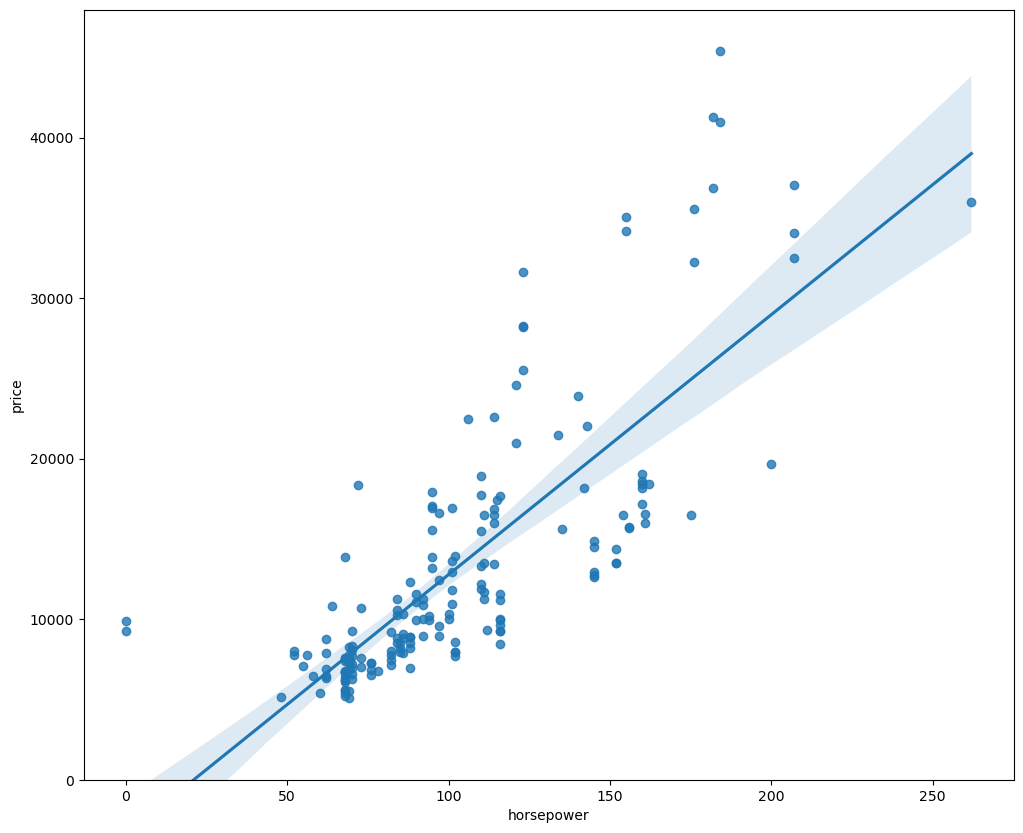

In [56]:
width=12
height=10
plt.figure(figsize = (width,height))
sns.regplot(x='horsepower',y='price',data=df2)
plt.ylim(0,)



(0.0, 47770.815599231464)

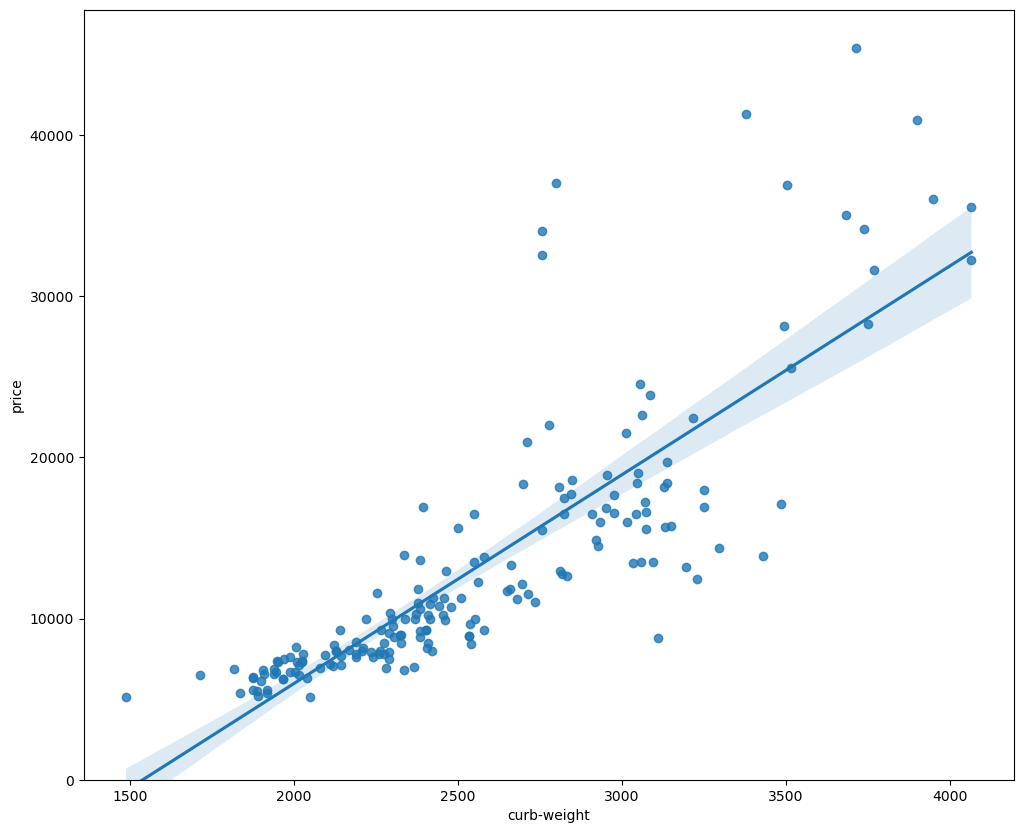

In [57]:
plt.figure(figsize=(width, height))
sns.regplot(x="curb-weight", y="price", data=df2)
plt.ylim(0,)

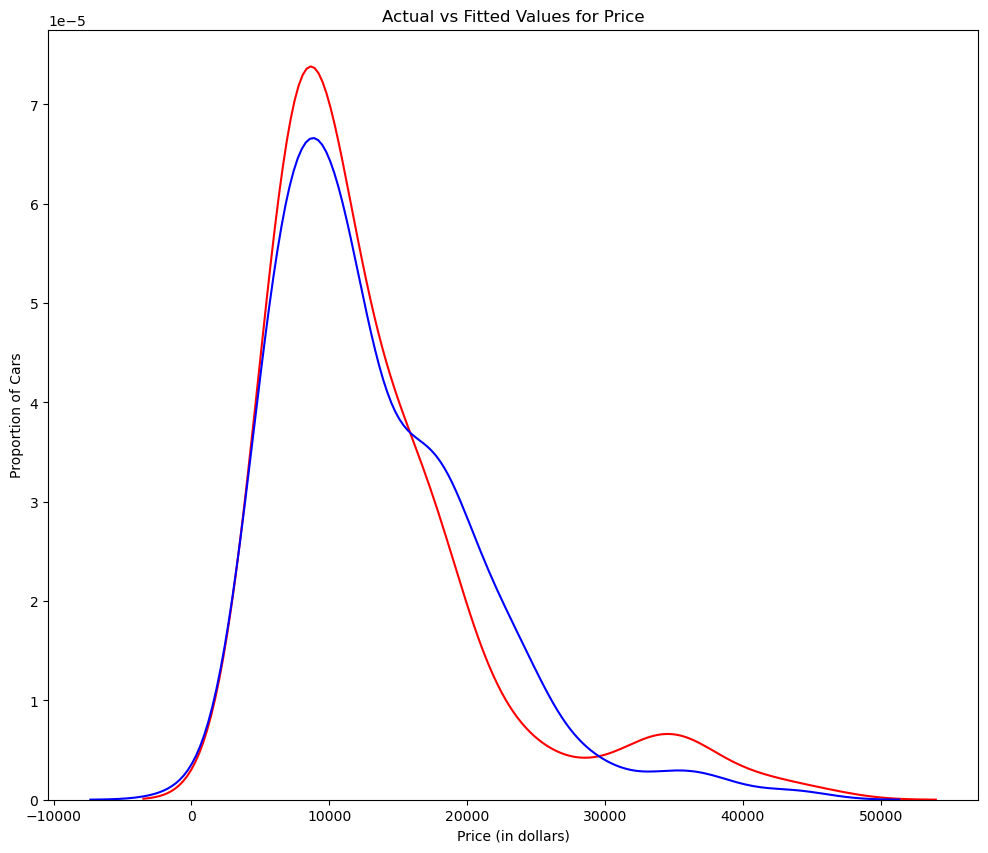

In [58]:
Yhat = lm.predict(Z)
plt.figure(figsize=(width,height))
ax1=sns.distplot(df2['price'],hist=False,color="r",label="Actual Values")
sns.distplot(Yhat,hist=False,color="b",label="Fitted Values",ax=ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

In [59]:
# fit the model 
lm.fit(Z, df2['price'])
# Find the R^2
lm.score(Z, df2['price'])

0.8067887191215882

In [60]:
# Produce a prediction 
Y_predict_multifit = lm.predict(Z)
# Compare the predicted results with the actual results
# The mean square error of price and predicted value using multifit is: 
mean_squared_error(df2['price'], Y_predict_multifit)

12626733.138034198

In [61]:
mse = mean_squared_error(df2['price'], Y_predict_multifit)


In [62]:
mse

12626733.138034198

In [63]:
rmse = np.sqrt(mse)

In [64]:
rmse

3553.4114788515835

In [65]:
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 3553.4114788515835


In [66]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [67]:
Y_predict_multifit

array([11823.17314202, 17766.32859219,  8719.8664719 , 17990.43644613,
       16696.52151463,  8507.20952722, 34439.62300392, 24493.43915892,
       10682.65833821, 11509.08631679,  8582.13983299, 11624.48282789,
       11093.89618403, 10350.50489863, 16773.2882269 , 11682.15815661,
        5506.71652588, 24498.16941687,  9869.94890757,  4567.2900805 ,
       16807.05584552, 24242.10659859, 16630.94397618, 10255.23609648,
        5800.02453415, 13555.71056523, 18448.66256807,  9864.8122722 ,
       17179.70023308, 29384.70840413,  6411.52902346, 11341.4790701 ,
        5289.75168195, 22963.70083511, 21484.35500381,  9747.43743693,
       19399.59084042, 19227.9309946 , 18955.47024196, 18558.90570683,
        5920.79057293,  9685.16091996, 23267.53842036, 11649.60410166,
       18590.51552953,  7200.13460962, 10174.59848912, 15362.94353261,
        6556.45451677, 27581.38681013, 11243.52758477, 15461.29724971,
       15295.20819824,  7207.71821738,  7207.71821738,  5800.02453415,
      

In [72]:
print(Y_predict_multifit[:20])

[11823.17314202 17766.32859219  8719.8664719  17990.43644613
 16696.52151463  8507.20952722 34439.62300392 24493.43915892
 10682.65833821 11509.08631679  8582.13983299 11624.48282789
 11093.89618403 10350.50489863 16773.2882269  11682.15815661
  5506.71652588 24498.16941687  9869.94890757  4567.2900805 ]


In [73]:
for i, value in enumerate(Y_predict_multifit[:20], start=1):
    print(f"{i}: {value}")

1: 11823.173142015057
2: 17766.328592192272
3: 8719.866471898134
4: 17990.436446128828
5: 16696.521514625383
6: 8507.209527219326
7: 34439.62300391875
8: 24493.439158920395
9: 10682.658338210742
10: 11509.08631679144
11: 8582.139832987654
12: 11624.48282788607
13: 11093.896184033052
14: 10350.50489863112
15: 16773.288226902492
16: 11682.158156609654
17: 5506.716525883865
18: 24498.1694168693
19: 9869.948907567901
20: 4567.290080504783


In [78]:
import csv

Y_predict_multifit = [11823.17314202, 17766.32859219, 8719.8664719, 17990.43644613, 16696.52151463, 8507.20952722, 34439.62300392, 24493.43915892, 10682.65833821, 11509.08631679, 8582.13983299, 11624.48282789, 11093.89618403, 10350.50489863, 16773.2882269, 11682.15815661, 5506.71652588, 24498.16941687, 9869.94890757, 4567.2900805]

# Specify the file name
csv_file = 'result_data1.csv'

# Open the CSV file in write mode
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(['Index', 'Value'])

    # Write the data
    for i, value in enumerate(Y_predict_multifit[:20], start=1):
        writer.writerow([i, value])

print(f"Data has been saved to '{csv_file}'")

Data has been saved to 'result_data1.csv'


In [79]:
data5 = pd.read_csv(filepath_or_buffer='result_data1.csv')

In [68]:
data5

Index       Value
0       1 11823.17314
1       2 17766.32859
2       3  8719.86647
3       4 17990.43645
4       5 16696.52151
5       6  8507.20953
6       7 34439.62300
7       8 24493.43916
8       9 10682.65834
9      10 11509.08632
10     11  8582.13983
11     12 11624.48283
12     13 11093.89618
13     14 10350.50490
14     15 16773.28823
15     16 11682.15816
16     17  5506.71653
17     18 24498.16942
18     19  9869.94891
19     20  4567.29008

In [68]:
data1 = pd.read_csv(filepath_or_buffer='TestData.csv')
print('Data Shape:', data1.shape)
data1.head()

Data Shape: (20, 26)


ID  symboling normalized-losses      make fuel-type aspiration  \
0   1         -2               103     volvo       gas        std   
1   2          0               188       bmw       gas        std   
2   3         -1                74     volvo       gas      turbo   
3   4          1               154  plymouth       gas        std   
4   5          1               103    nissan       gas        std   

  num-of-doors body-style drive-wheels engine-location  wheel-base    length  \
0         four      sedan          rwd           front   104.30000 188.80000   
1         four      sedan          rwd           front   101.20000 176.80000   
2         four      wagon          rwd           front   104.30000 188.80000   
3         four      sedan          fwd           front    93.70000 167.30000   
4         four      wagon          fwd           front    94.50000 170.20000   

     width   height  curb-weight engine-type num-of-cylinders  engine-size  \
0 67.20000 56.20000         2912         ohc             four          141   
1 64.80000 54.30000         2765         ohc              six          164   
2 67.20000 57.50000         3157         ohc             four          130   
3 63.80000 50.80000         1989         ohc             four           90   
4 63.80000 53.50000         2037         ohc             four           97   

  fuel-system    bore  stroke  compression-ratio  horsepower  peak-rpm  \
0        mpfi 3.78000 3.15000            9.50000         114      5400   
1        mpfi 3.31000 3.19000            9.00000         121      4250   
2        mpfi 3.62000 3.15000            7.50000         162      5100   
3        2bbl 2.97000 3.23000            9.40000          68      5500   
4        2bbl 3.15000 3.29000            9.40000          69      5200   

   city-mpg  highway-mpg  
0        23           28  
1        21           28  
2        17           22  
3        31           38  
4        31           37

In [70]:
data1.isnull().sum().sum()

0

In [71]:
df5=data1.fillna(value=0)

In [72]:
df5.isnull().sum().sum()

0

In [73]:
df5['horsepower']

0     114
1     121
2     162
3      68
4      69
5      68
6     120
7      97
8      76
9      68
10    110
11     69
12     70
13     62
14    110
15    182
16    112
17     95
18    101
19     56
Name: horsepower, dtype: int64

In [75]:
df5

ID  symboling normalized-losses        make fuel-type aspiration  \
0    1         -2               103       volvo       gas        std   
1    2          0               188         bmw       gas        std   
2    3         -1                74       volvo       gas      turbo   
3    4          1               154    plymouth       gas        std   
4    5          1               103      nissan       gas        std   
5    6          2                94  volkswagen    diesel      turbo   
6    7          0               118       mazda       gas        std   
7    8          0               161      peugot       gas        std   
8    9          1               101       honda       gas        std   
9   10          2               161  mitsubishi       gas        std   
10  11          3               150        saab       gas        std   
11  12          1               128      nissan       gas        std   
12  13          1               168      toyota       gas        std   
13  14          1                87      toyota       gas        std   
14  15          2                 ?        audi       gas        std   
15  16          0                 ?         bmw       gas        std   
16  17          1               168      toyota       gas        std   
17  18          0                 ?      peugot       gas        std   
18  19          2               192         bmw       gas        std   
19  20          0                91      toyota    diesel        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base    length  \
0          four      sedan          rwd           front   104.30000 188.80000   
1          four      sedan          rwd           front   101.20000 176.80000   
2          four      wagon          rwd           front   104.30000 188.80000   
3          four      sedan          fwd           front    93.70000 167.30000   
4          four      wagon          fwd           front    94.50000 170.20000   
5          four      sedan          fwd           front    97.30000 171.70000   
6          four      sedan          rwd           front   104.90000 175.00000   
7          four      sedan          rwd           front   107.90000 186.70000   
8           two  hatchback          fwd           front    93.70000 150.00000   
9           two  hatchback          fwd           front    93.70000 157.30000   
10          two  hatchback          fwd           front    99.10000 186.60000   
11          two      sedan          fwd           front    94.50000 165.30000   
12          two  hatchback          rwd           front    94.50000 168.70000   
13          two  hatchback          fwd           front    95.70000 158.70000   
14          two      sedan          fwd           front    99.80000 177.30000   
15         four      sedan          rwd           front   103.50000 189.00000   
16          two  hatchback          rwd           front    94.50000 168.70000   
17         four      wagon          rwd           front   114.20000 198.90000   
18          two      sedan          rwd           front   101.20000 176.80000   
19         four      sedan          fwd           front    95.70000 166.30000   

      width   height  curb-weight engine-type num-of-cylinders  engine-size  \
0  67.20000 56.20000         2912         ohc             four          141   
1  64.80000 54.30000         2765         ohc              six          164   
2  67.20000 57.50000         3157         ohc             four          130   
3  63.80000 50.80000         1989         ohc             four           90   
4  63.80000 53.50000         2037         ohc             four           97   
5  65.50000 55.70000         2319         ohc             four           97   
6  66.10000 54.40000         2670         ohc             four          140   
7  68.40000 56.70000         3020           l             four          120   
8  64.00000 52.60000         1956         ohc             four           92   

In [82]:
Z_test = data1[['length', 'curb-weight', 'engine-size', 'highway-mpg','horsepower']]

In [83]:
predicted_prices = lm.predict(Z_test)

In [84]:
data1['predicted_price'] = predicted_prices

In [85]:
predicted_prices

array([16592.6606686 , 18014.69148485, 18954.41973131,  5941.69037956,
        6797.90885596,  8205.79693629, 15484.32658957, 14338.3953066 ,
        5977.8495869 ,  5762.99544462, 13776.97932415,  6191.12560576,
        7565.64208998,  5704.9219381 , 13890.93637457, 26836.03386071,
        9905.48655044, 15609.37046842, 10738.2798157 ,  8224.70299682])

In [86]:
print(data1[['length', 'curb-weight', 'engine-size', 'highway-mpg', 'predicted_price']])

      length  curb-weight  engine-size  highway-mpg  predicted_price
0  188.80000         2912          141           28      16592.66067
1  176.80000         2765          164           28      18014.69148
2  188.80000         3157          130           22      18954.41973
3  167.30000         1989           90           38       5941.69038
4  170.20000         2037           97           37       6797.90886
5  171.70000         2319           97           42       8205.79694
6  175.00000         2670          140           27      15484.32659
7  186.70000         3020          120           24      14338.39531
8  150.00000         1956           92           34       5977.84959
9  157.30000         1944           92           38       5762.99544
10 186.60000         2707          121           28      13776.97932
11 165.30000         1918           97           37       6191.12561
12 168.70000         2204           98           34       7565.64209
13 158.70000         1985         

In [87]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [96]:
df3=df2

In [98]:
actual_prices = df3['price']

In [94]:
predicted_prices = data1['predicted_price']


In [99]:
predicted_prices

0    16592.66067
1    18014.69148
2    18954.41973
3     5941.69038
4     6797.90886
5     8205.79694
6    15484.32659
7    14338.39531
8     5977.84959
9     5762.99544
10   13776.97932
11    6191.12561
12    7565.64209
13    5704.92194
14   13890.93637
15   26836.03386
16    9905.48655
17   15609.37047
18   10738.27982
19    8224.70300
Name: predicted_price, dtype: float64

In [100]:
index_values = list(range(1, len(predicted_prices) + 1))


In [104]:
print(predicted_prices)

0    16592.66067
1    18014.69148
2    18954.41973
3     5941.69038
4     6797.90886
5     8205.79694
6    15484.32659
7    14338.39531
8     5977.84959
9     5762.99544
10   13776.97932
11    6191.12561
12    7565.64209
13    5704.92194
14   13890.93637
15   26836.03386
16    9905.48655
17   15609.37047
18   10738.27982
19    8224.70300
Name: predicted_price, dtype: float64


In [105]:
for i, value in enumerate(predicted_prices, start=1):
    print(f"{i}: {value}")

1: 16592.660668603414
2: 18014.69148485351
3: 18954.419731305257
4: 5941.690379560798
5: 6797.908855956157
6: 8205.79693628525
7: 15484.32658957201
8: 14338.395306600745
9: 5977.849586897759
10: 5762.995444615724
11: 13776.979324146028
12: 6191.125605764006
13: 7565.6420899788245
14: 5704.92193810485
15: 13890.936374573757
16: 26836.033860706346
17: 9905.486550440794
18: 15609.370468416411
19: 10738.279815699818
20: 8224.702996817057


In [106]:
import csv

In [107]:
csv_file = 'result_data3.csv'

In [108]:
# Open the CSV file in write mode
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)

    # Write the header
    writer.writerow(['Index', 'Value'])

    # Write the data
    for i, value in enumerate(predicted_prices, start=1):
        writer.writerow([i, value])

print(f"Data has been saved to '{csv_file}'")

Data has been saved to 'result_data3.csv'


In [109]:
data6 = pd.read_csv(filepath_or_buffer='result_data3.csv')

In [110]:
data6

Index       Value
0       1 16592.66067
1       2 18014.69148
2       3 18954.41973
3       4  5941.69038
4       5  6797.90886
5       6  8205.79694
6       7 15484.32659
7       8 14338.39531
8       9  5977.84959
9      10  5762.99544
10     11 13776.97932
11     12  6191.12561
12     13  7565.64209
13     14  5704.92194
14     15 13890.93637
15     16 26836.03386
16     17  9905.48655
17     18 15609.37047
18     19 10738.27982
19     20  8224.70300